In [17]:
import importlib
import ccf_utils
importlib.reload(ccf_utils)


<module 'ccf_utils' from 'c:\\Users\\dumas\\PycharmProjects\\Credit\\Credit-Risk-Project\\ccf_utils.py'>

In [18]:
from ccf_utils import load_segment_and_global_data, load_macro_data, describe_dataframe

segment_path = 'data/Données_CCF_PAR_SEGMENT.csv'
global_path = 'data/Données_CCF_SERIE_GLOBALE_VF.csv'
macro_path = 'data/macrovariables/historique_macro_variables_projet_CCF_FowardLooking_IFRS9.xlsx'

df_segment, df_global = load_segment_and_global_data(segment_path, global_path)
df_macro = load_macro_data(macro_path)

describe_dataframe(df_segment, "Segment")
describe_dataframe(df_global, "Global")
describe_dataframe(df_macro, "Macro")


=== Description de Segment ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cod_prd_ref            360 non-null    object
 1   note_ref               360 non-null    int64 
 2   Indicateur_moyen_Brut  360 non-null    object
 3   PourcNote              360 non-null    object
 4   PourcNoteCohorte       360 non-null    object
 5   PourcNoteCohorte5      360 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.0+ KB
None
      cod_prd_ref  note_ref Indicateur_moyen_Brut           PourcNote  \
0          2009T1         1           0,451962798  0,0128162511542013   
1          2009T1         2             0,9185154  0,0150016761649346   
2          2009T1         3           0,919842763  0,0188878742730812   
3          2009T1         4           1,275863582  0,0148540805032912   
4          2009T1         5         

c:\Users\dumas\PycharmProjects\Credit\Credit-Risk-Project\ccf_utils.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df[source_col].astype(str).str.strip().str.replace('T', 'Q'))


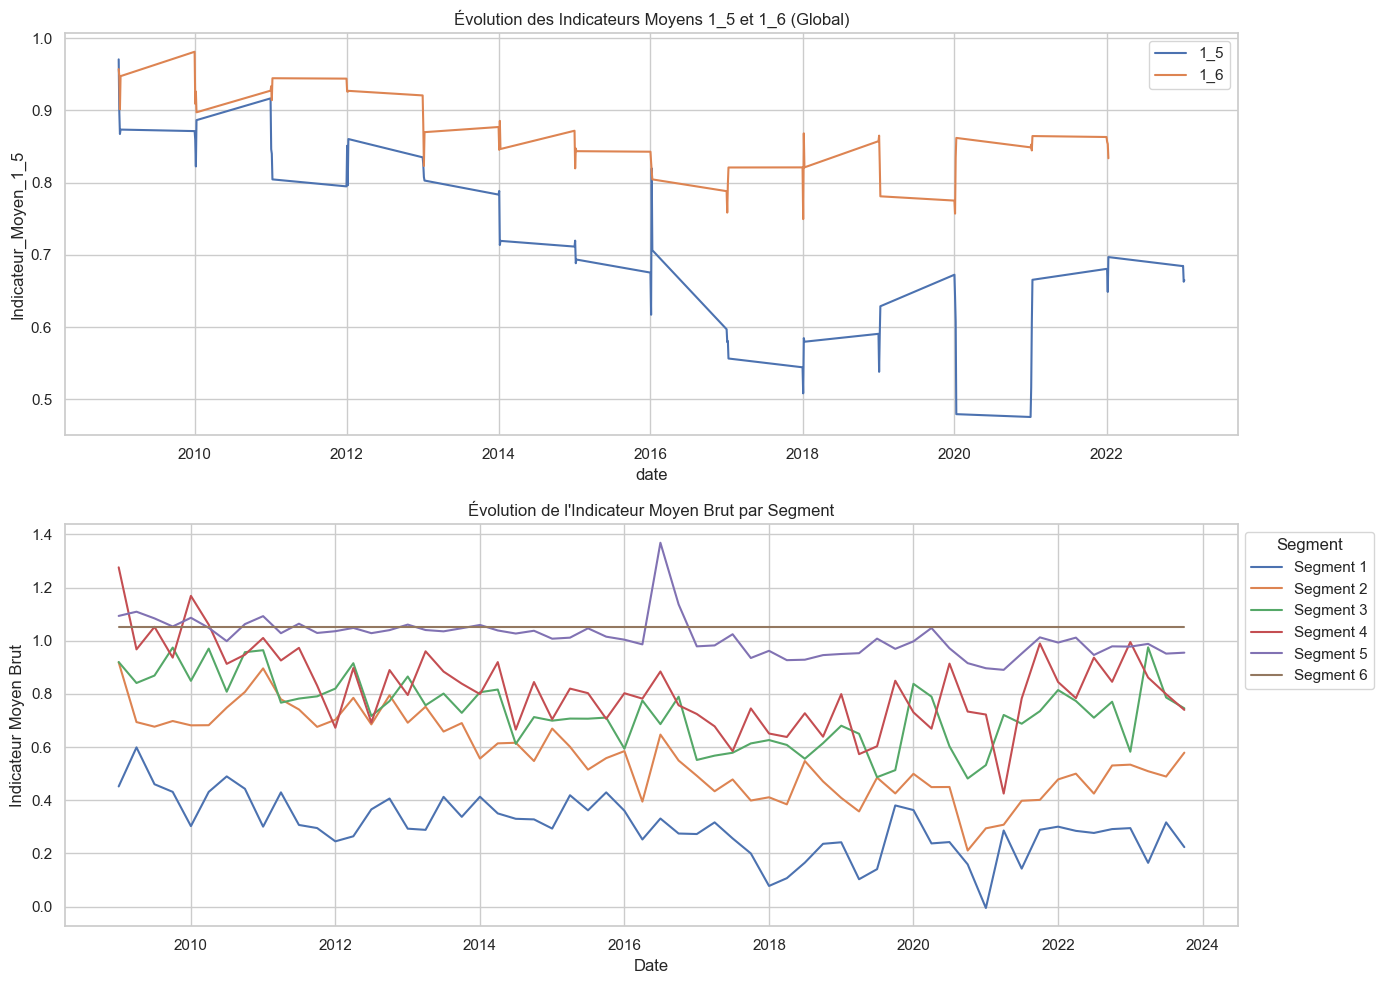

In [19]:
from ccf_utils import (
    clean_numeric_columns, convert_global_dates, convert_segment_dates,
    plot_ccf_global_and_segment
)

# Nettoyage
df_global = clean_numeric_columns(df_global, ['Indicateur_Moyen_1_5', 'Effectif_Pourc_1_5', 'Indicateur_Moyen_1_6', 'Effectif_Pourc_1_6'])
df_segment = clean_numeric_columns(df_segment, ['Indicateur_moyen_Brut', 'PourcNote', 'PourcNoteCohorte', 'PourcNoteCohorte5'])

# Conversion des dates
df_global = convert_global_dates(df_global)
df_segment = convert_segment_dates(df_segment)

# Visualisation
plot_ccf_global_and_segment(df_global, df_segment)


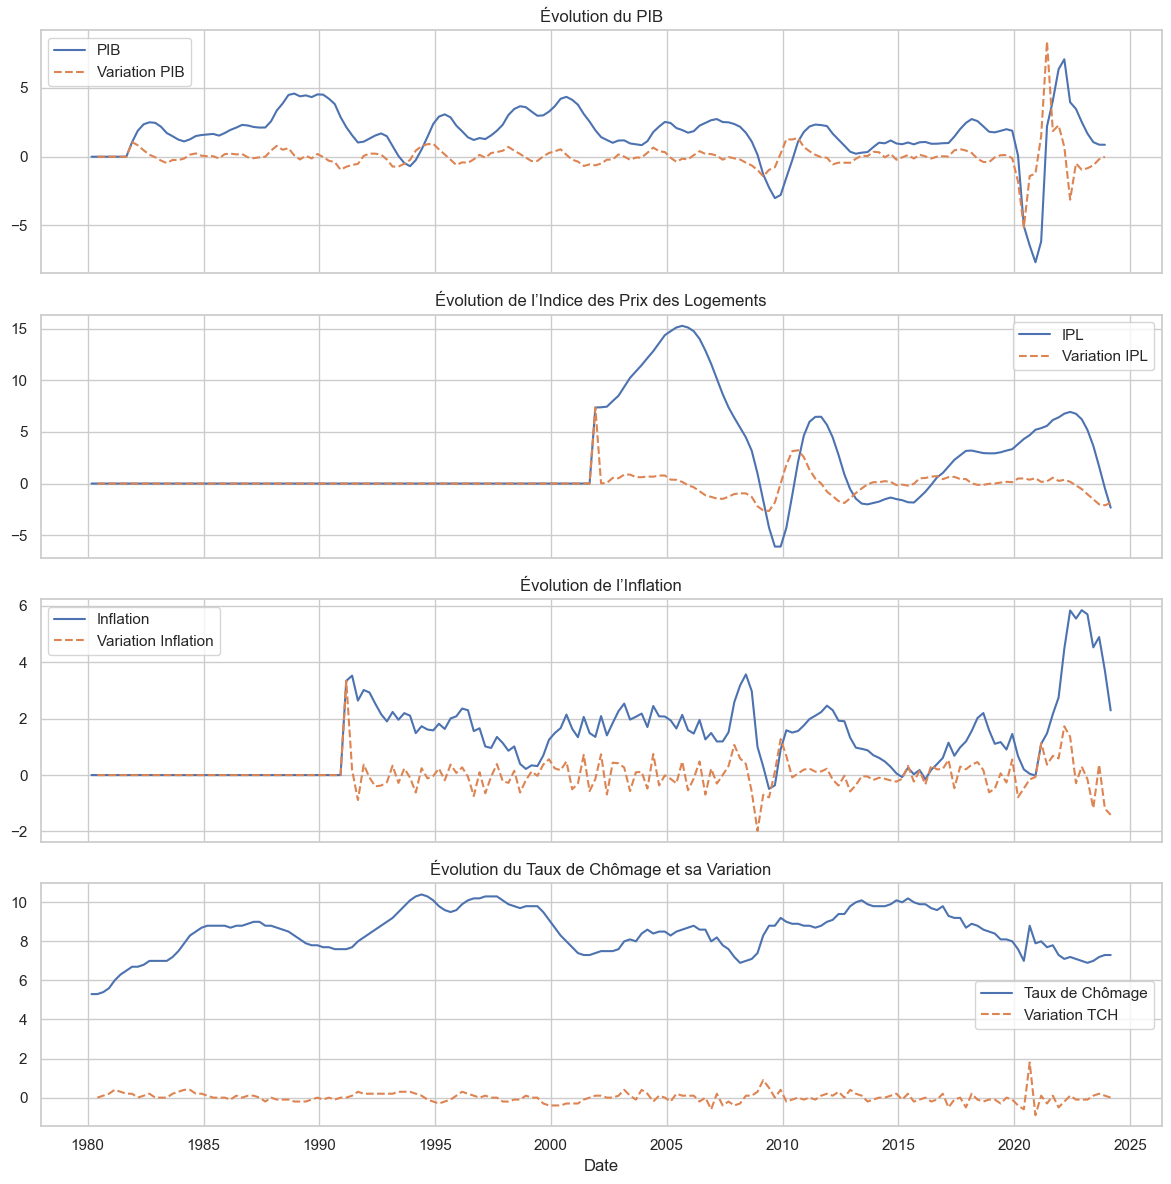

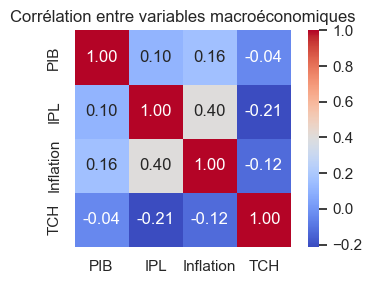

In [20]:
from ccf_utils import plot_macro_variables, plot_macro_correlation

plot_macro_variables(df_macro)
plot_macro_correlation(df_macro)


In [21]:
from ccf_utils import standardize_macro_dates, compare_dates_2009

df_macro = standardize_macro_dates(df_macro)
df_dates_2009 = compare_dates_2009(df_global, df_segment, df_macro)


  Dates df_global (2009) Dates df_segment (2009) Dates df_macro (2009)
0             2009-01-01              2009-01-01            2009-01-01
1             2009-01-04              2009-04-01            2009-04-01
2             2009-01-07              2009-07-01            2009-07-01
3             2009-01-10              2009-10-01            2009-10-01


In [22]:
from ccf_utils import create_merged_dataset

df_merged, df_merged_6 = create_merged_dataset(df_segment, df_macro)
df_merged.head()


,Indicateur_moyen_Brut_1,Indicateur_moyen_Brut_2,Indicateur_moyen_Brut_3,Indicateur_moyen_Brut_4,Indicateur_moyen_Brut_5,Indicateur_moyen_Brut_6,PourcNoteCohorte5_1,PourcNoteCohorte5_2,PourcNoteCohorte5_3,PourcNoteCohorte5_4,...,TCH,Inflation,PIB_diff1,IPL_diff1,TCH_diff1,Inflation_diff1,PIB_lag1,IPL_lag1,Inflation_lag1,TCH_lag1
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,0.451963,0.918515,0.919843,1.275864,1.093203,1.05,0.115244,0.237795,0.130521,0.084689,...,8.3,0.301692,-1.430885,-2.593841,0.9,-0.697982,0.144097,-2.204378,-1.979658,0.3
2009-04-01,0.598795,0.693970,0.840965,0.967390,1.109015,1.05,0.109356,0.254647,0.131660,0.101921,...,8.8,-0.489570,-0.956314,-2.654313,0.5,-0.791262,-1.286788,-2.593841,-0.697982,0.9
2009-07-01,0.460212,0.676645,0.868909,1.052081,1.083922,1.05,0.100492,0.295740,0.142272,0.091207,...,8.8,-0.362976,-0.769164,-1.824787,0.0,0.126594,-2.243102,-2.654313,-0.791262,0.5
2009-10-01,0.431518,0.697949,0.974173,0.936315,1.053459,1.05,0.102461,0.265383,0.130819,0.098983,...,9.2,0.914470,0.229433,-0.001851,0.4,1.277447,-3.012266,-1.824787,0.126594,0.0
2010-01-01,0.302710,0.681718,0.849149,1.168515,1.086222,1.05,0.109683,0.255927,0.143388,0.103970,...,9.0,1.589859,1.265167,1.827158,-0.2,0.675389,-2.782833,-0.001851,1.277447,0.4


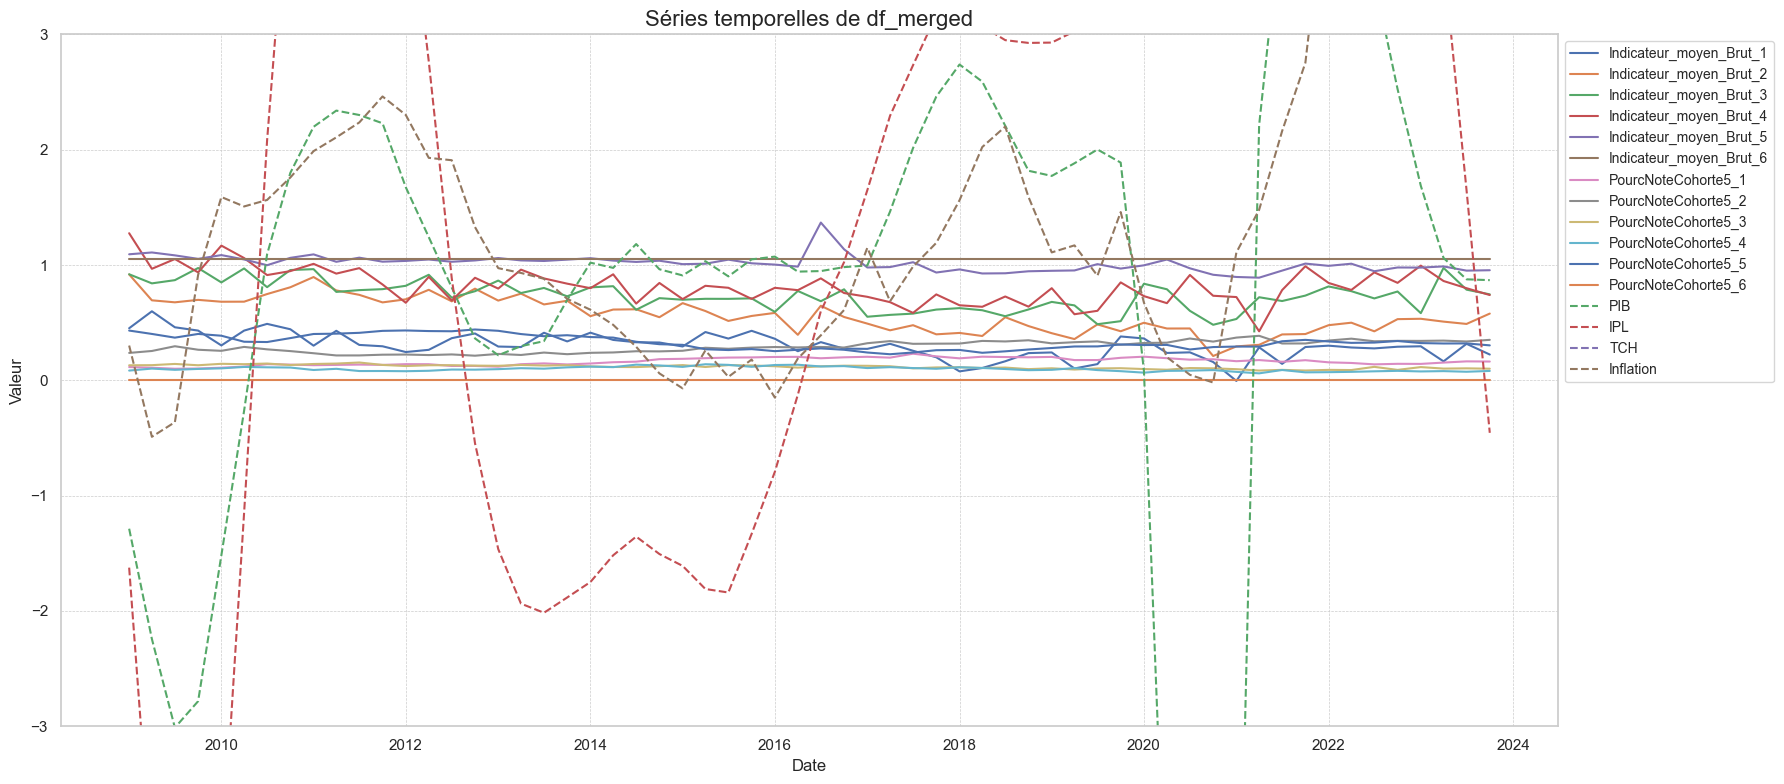

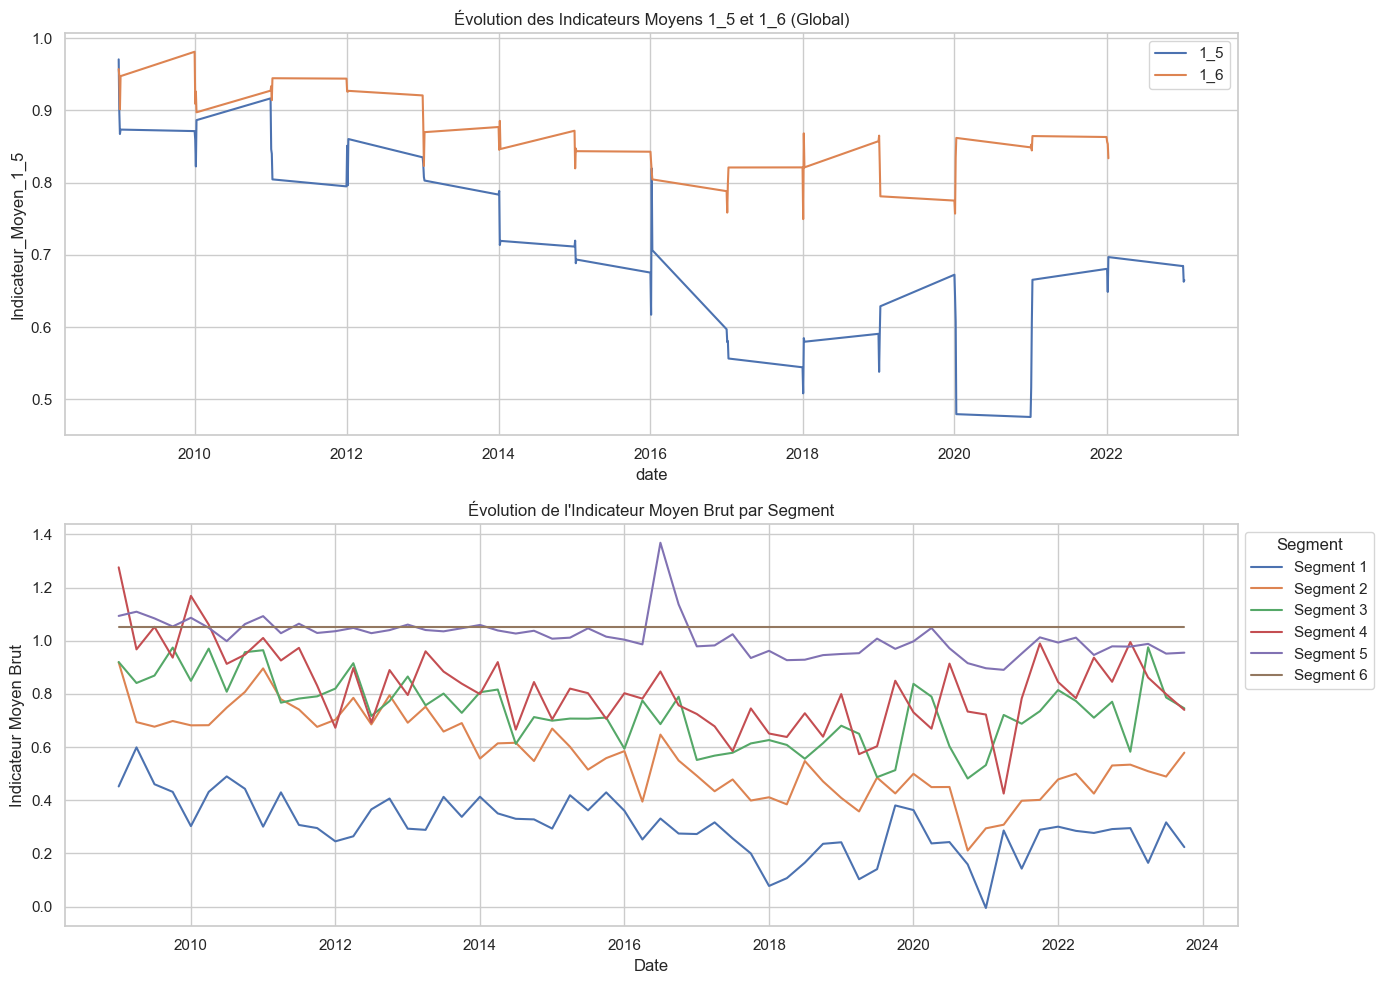

In [23]:
from ccf_utils import plot_merged_series, plot_global_and_segment_evolution

plot_merged_series(df_merged)
plot_global_and_segment_evolution(df_global, df_segment)


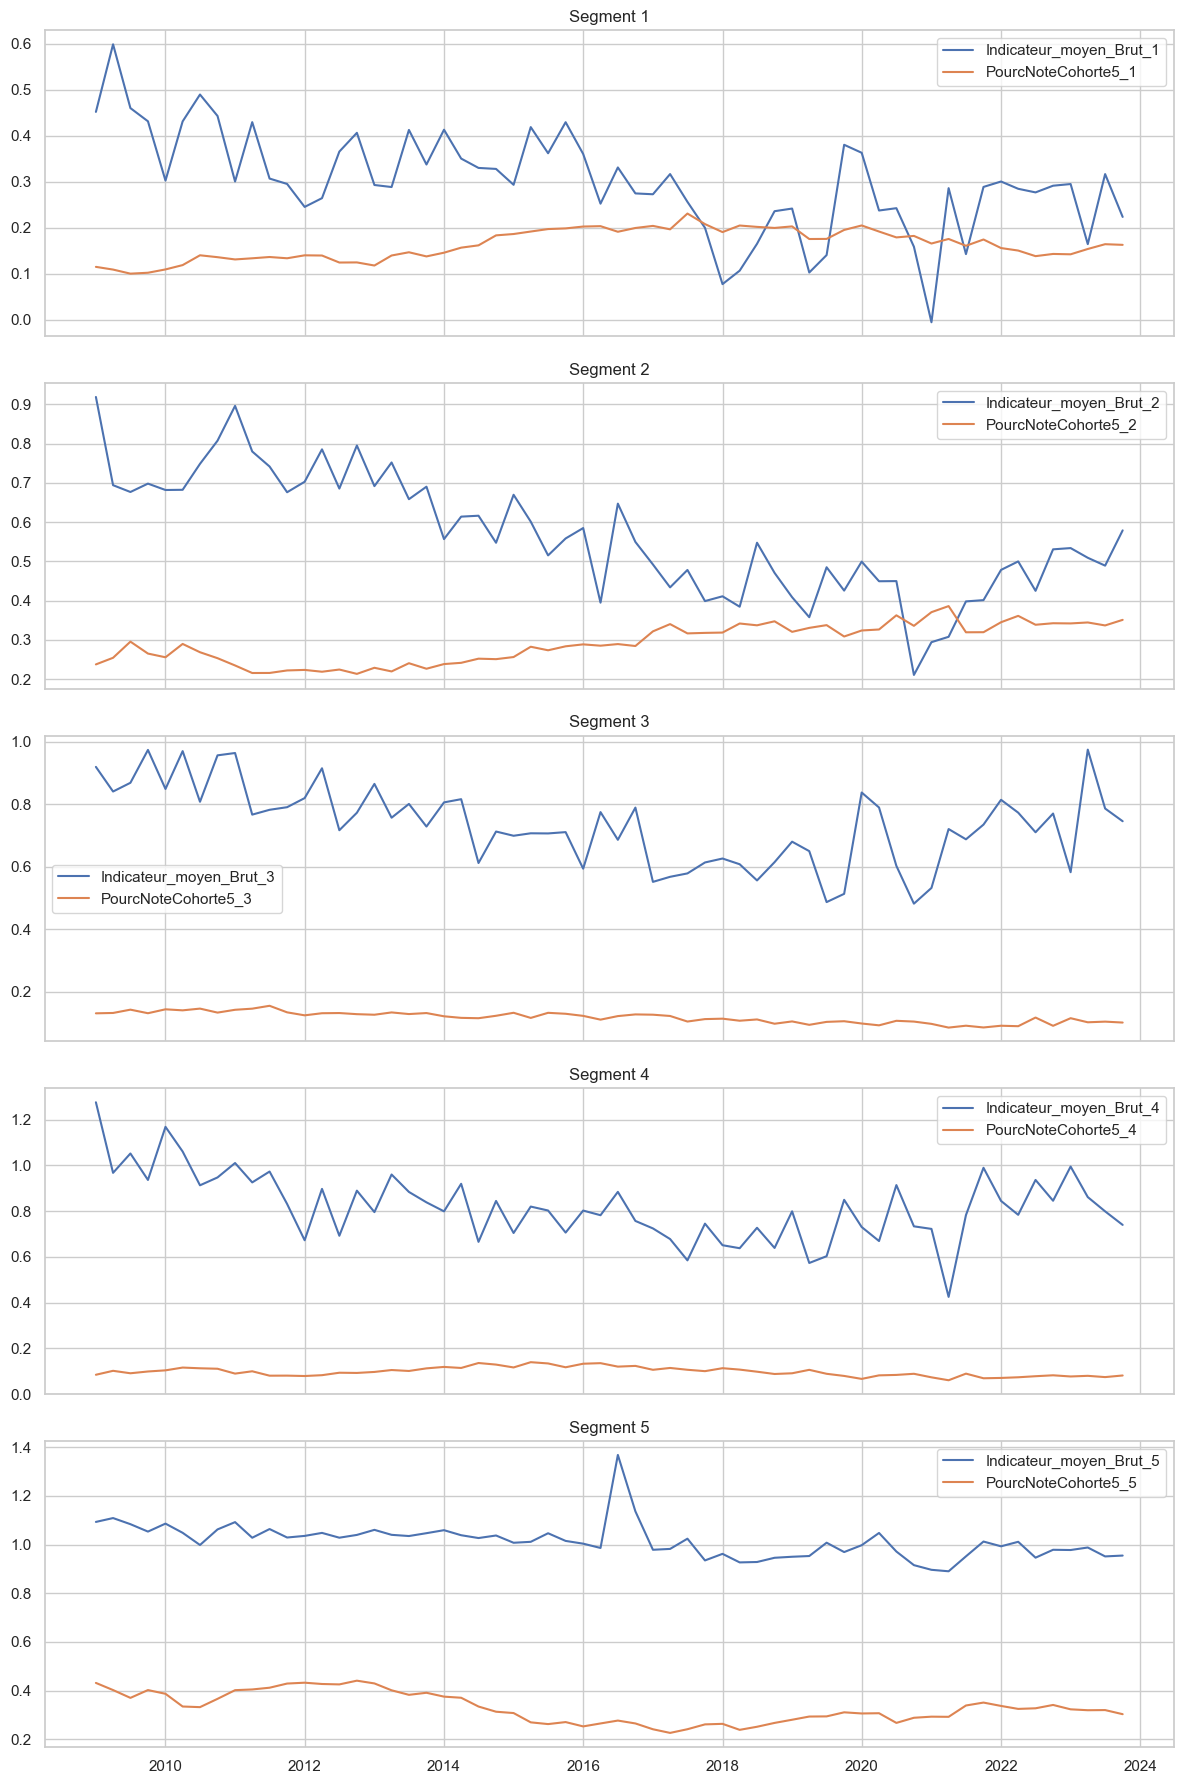

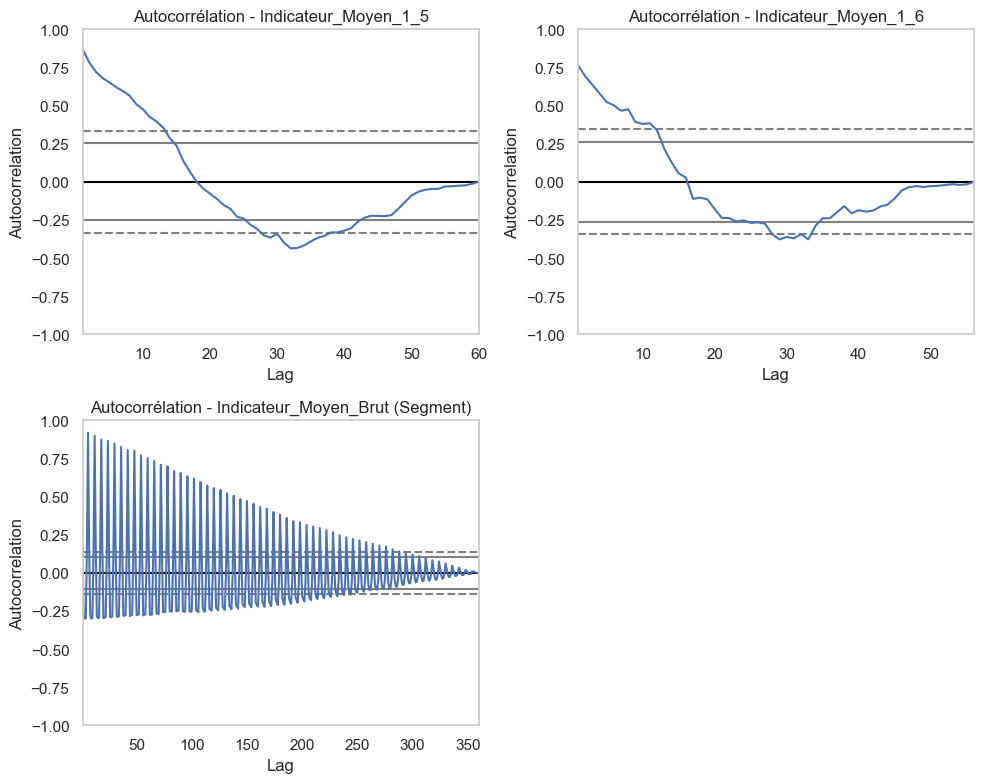

In [24]:
from ccf_utils import plot_pourc_note_vs_indicateur, plot_autocorrelations

plot_pourc_note_vs_indicateur(df_merged)
plot_autocorrelations(df_global, df_segment)


In [25]:
from ccf_utils import run_adf_tests_named, run_adf_tests_by_segment

# Global + brut
series_dict = {
    "Indicateur_Moyen_1_5": df_global["Indicateur_Moyen_1_5"],
    "Indicateur_Moyen_1_6": df_global["Indicateur_Moyen_1_6"],
    "Indicateur_Moyen_Brut": df_segment["Indicateur_moyen_Brut"]
}
adf_df_corrected = run_adf_tests_named(series_dict)
display(adf_df_corrected)

# Par segment
adf_segment_df = run_adf_tests_by_segment(df_segment)
display(adf_segment_df)


,Série,ADF Statistic,p-value,Critique 1%,Critique 5%,Critique 10%
0,Indicateur_Moyen_1_5,-2.371826,0.149847,-3.546395,-2.911939,-2.593652
1,Indicateur_Moyen_1_6,-2.128698,0.233133,-3.557709,-2.916770,-2.596222
2,Indicateur_Moyen_Brut,-2.053515,0.263612,-3.449616,-2.870028,-2.571292


,Série,ADF Statistic,p-value,Critique 1%,Critique 5%,Critique 10%,Note
0,Indicateur_Moyen_Brut_1,-3.983272,0.001501,-3.546395,-2.911939,-2.593652,NaN
1,Indicateur_Moyen_Brut_2,-1.833660,0.363883,-3.548494,-2.912837,-2.594129,NaN
2,Indicateur_Moyen_Brut_3,-2.228654,0.196010,-3.565624,-2.920142,-2.598015,NaN
3,Indicateur_Moyen_Brut_4,-5.324879,0.000005,-3.546395,-2.911939,-2.593652,NaN
4,Indicateur_Moyen_Brut_5,-4.430622,0.000262,-3.546395,-2.911939,-2.593652,NaN
5,Indicateur_Moyen_Brut_6,NaN,NaN,NaN,NaN,NaN,Constant series - skipped


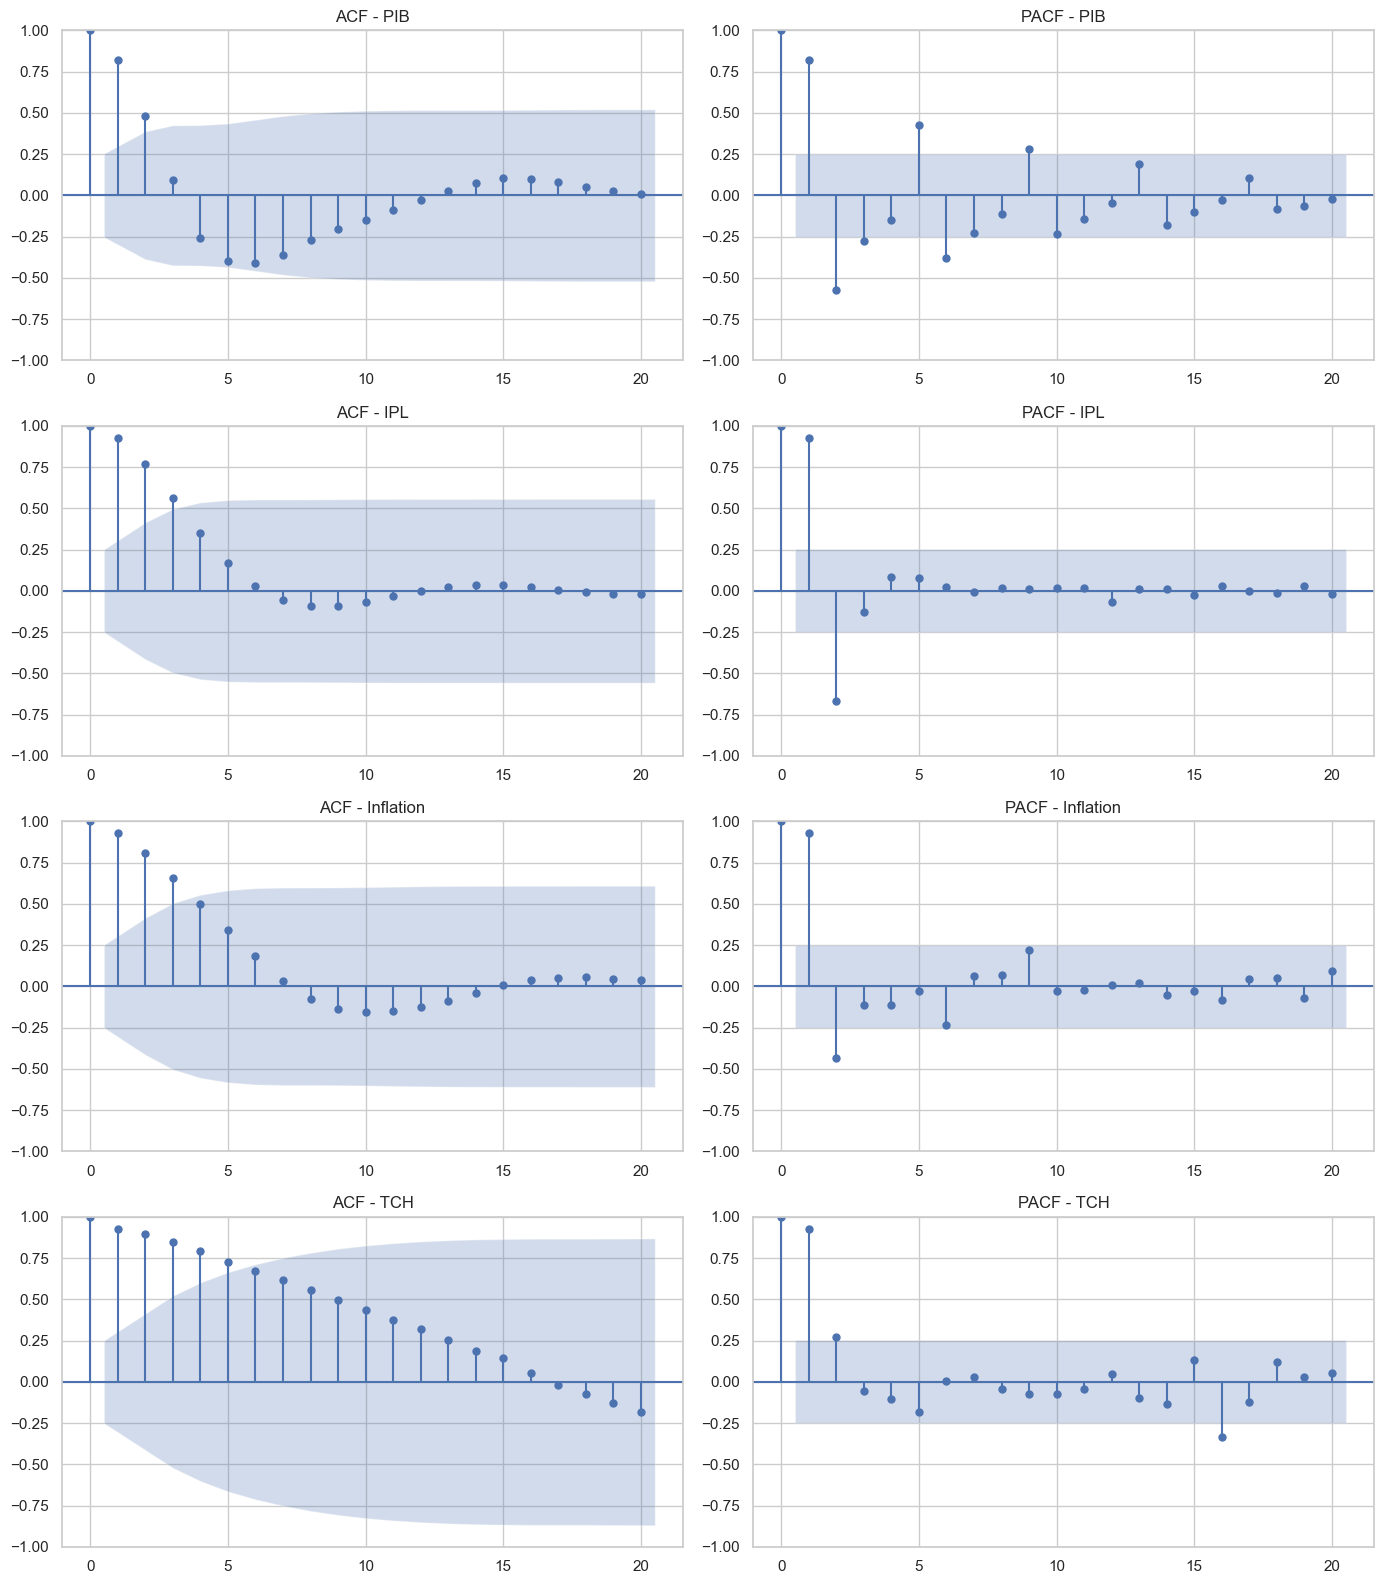

,Variable,ADF Statistic,p-value,Critique 1%,Critique 5%,Critique 10%
0,PIB,-3.327967,0.013674,-3.571472,-2.922629,-2.599336
1,IPL,-1.542183,0.512550,-3.568486,-2.921360,-2.598662
2,Inflation,-1.320889,0.619562,-3.562879,-2.918973,-2.597393
3,TCH,-0.270556,0.929572,-3.546395,-2.911939,-2.593652


In [26]:
from ccf_utils import filter_macro_since_2009, analyze_macro_stationarity

df_macro = filter_macro_since_2009(df_macro)
adf_df_macro = analyze_macro_stationarity(df_macro)
display(adf_df_macro)


,Série (log_diff),ADF Statistic,p-value,Critique 1%,Critique 5%,Critique 10%
0,Indicateur_Moyen_1_5,-7.978240,2.666293e-12,-3.548494,-2.912837,-2.594129
1,Indicateur_Moyen_1_6,-10.682798,3.901238e-19,-3.557709,-2.916770,-2.596222


,Segment,ADF Statistic,p-value,Critique 1%,Critique 5%,Critique 10%
0,segment_2,-5.251563,0.000007,-3.557709,-2.916770,-2.596222
1,segment_3,-2.863254,0.049791,-3.565624,-2.920142,-2.598015


,Segment,ADF Statistic,p-value,Critique 1%,Critique 5%,Critique 10%
0,segment_2,-5.156570,0.000011,-3.557709,-2.916770,-2.596222
1,segment_3,-1.275033,0.640516,-3.577848,-2.925338,-2.600774


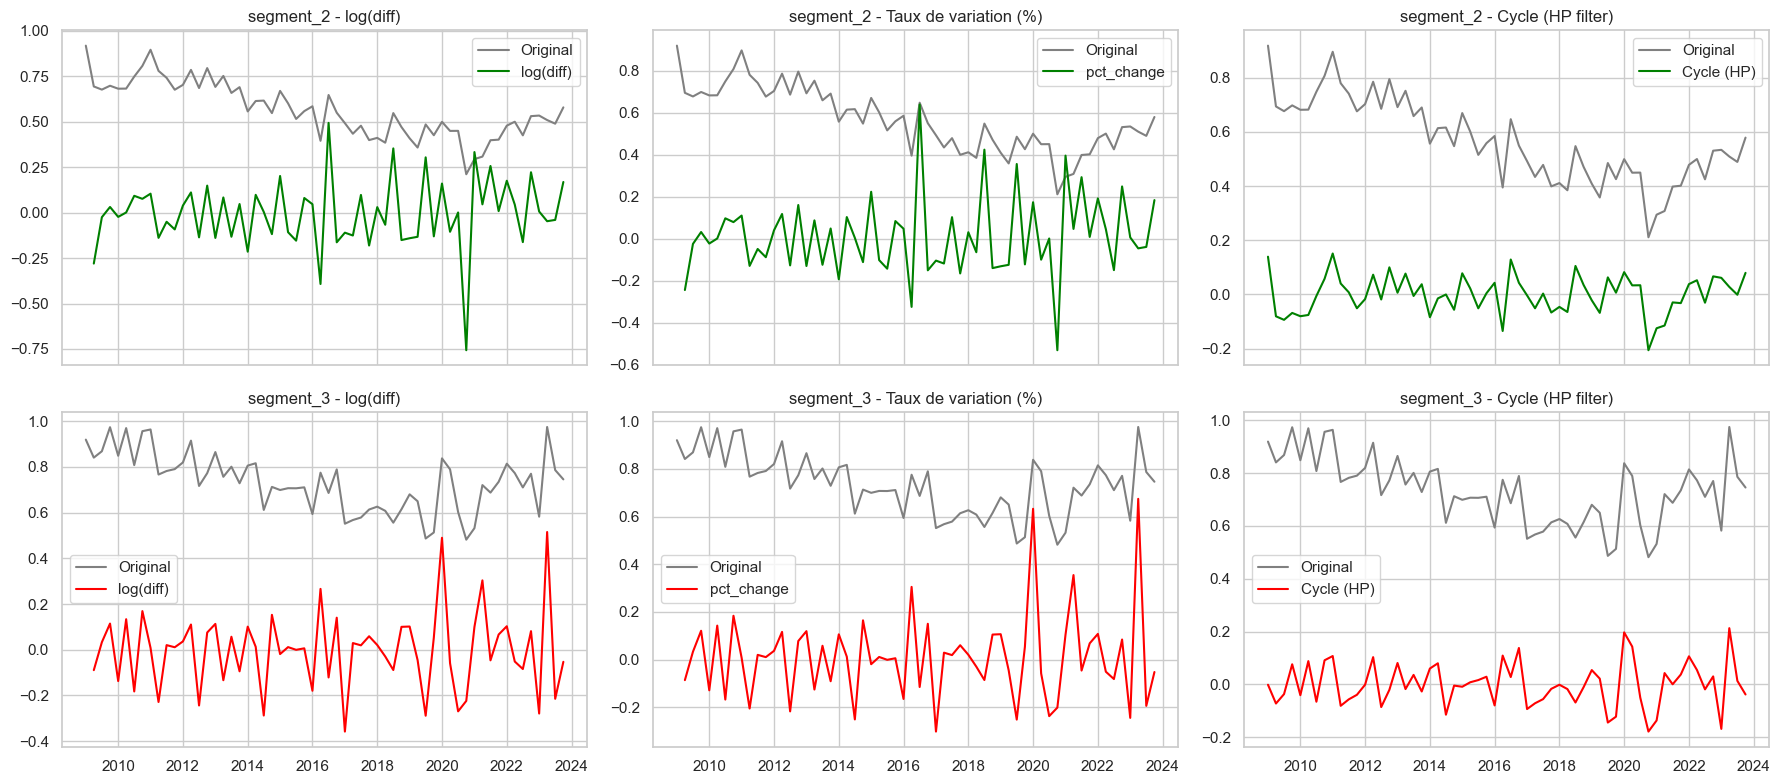

In [27]:
from ccf_utils import run_adf_logdiff, transform_and_test_segments, plot_transformed_segments
import pandas as pd 

# ADF sur log(diff) global
log_diff_dict = {
    "Indicateur_Moyen_1_5": df_global["Indicateur_Moyen_1_5"],
    "Indicateur_Moyen_1_6": df_global["Indicateur_Moyen_1_6"]
}
df_adf_logdiff = run_adf_logdiff(log_diff_dict)
display(df_adf_logdiff)


segments_dfs = {
    f"segment_{i}": df_segment[df_segment["note_ref"] == i].reset_index(drop=True)
    for i in sorted(df_segment["note_ref"].unique())
}

results = transform_and_test_segments({k: v for k, v in segments_dfs.items() if k in ["segment_2", "segment_3"]})

logdiff_dfs = results["logdiff"]
pctchange_dfs = results["pctchange"]
hp_cycle_dfs = results["hpfilter"]
# Résumés ADF
display(pd.DataFrame(results["adf_logdiff"]))
display(pd.DataFrame(results["adf_pctchange"]))

# Visualisation
plot_transformed_segments(segments_dfs, results["logdiff"], results["pctchange"], results["hpfilter"])


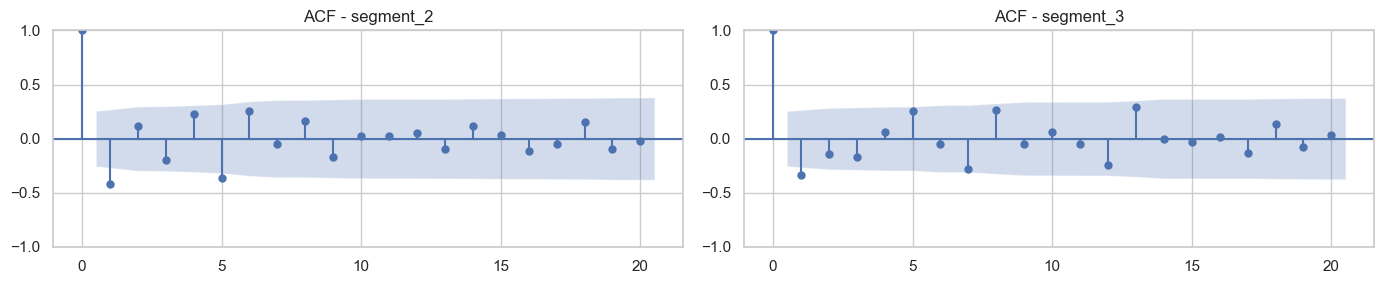

,Segment,ADF Statistic,p-value,Critique 1%,Critique 5%,Critique 10%
0,segment_2,-5.156570,0.000011,-3.557709,-2.916770,-2.596222
1,segment_3,-2.863254,0.049791,-3.565624,-2.920142,-2.598015


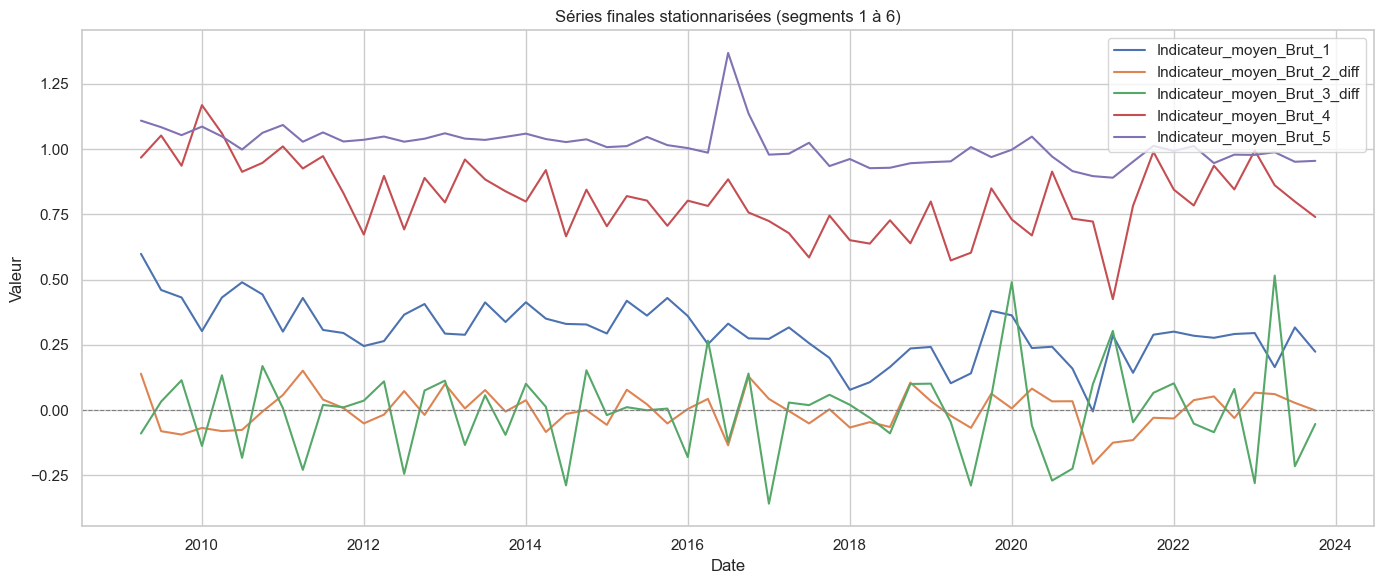

In [28]:
from ccf_utils import recheck_stationarity, inject_transformed_segments, plot_final_stationary_series

# Re-check des séries finales
series_finales = {
    "segment_2": pctchange_dfs["segment_2"]["pct_change"],
    "segment_3": logdiff_dfs["segment_3"]["log_diff"]
}
adf_final = recheck_stationarity(series_finales)
display(adf_final)

# Injection dans df_merged
df_merged = inject_transformed_segments(df_merged, segments_dfs, logdiff_dfs, hp_cycle_dfs)

# Visualisation
plot_final_stationary_series(df_merged)


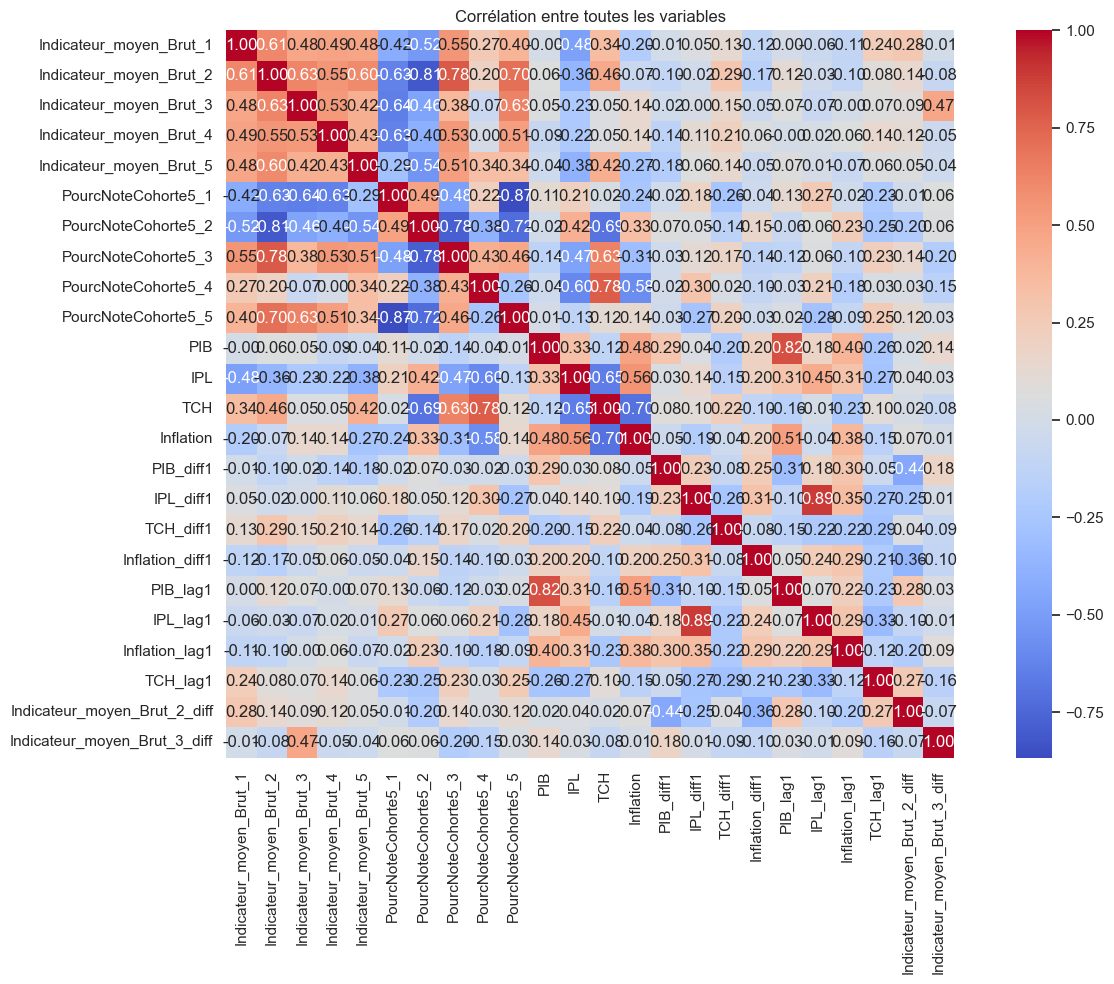

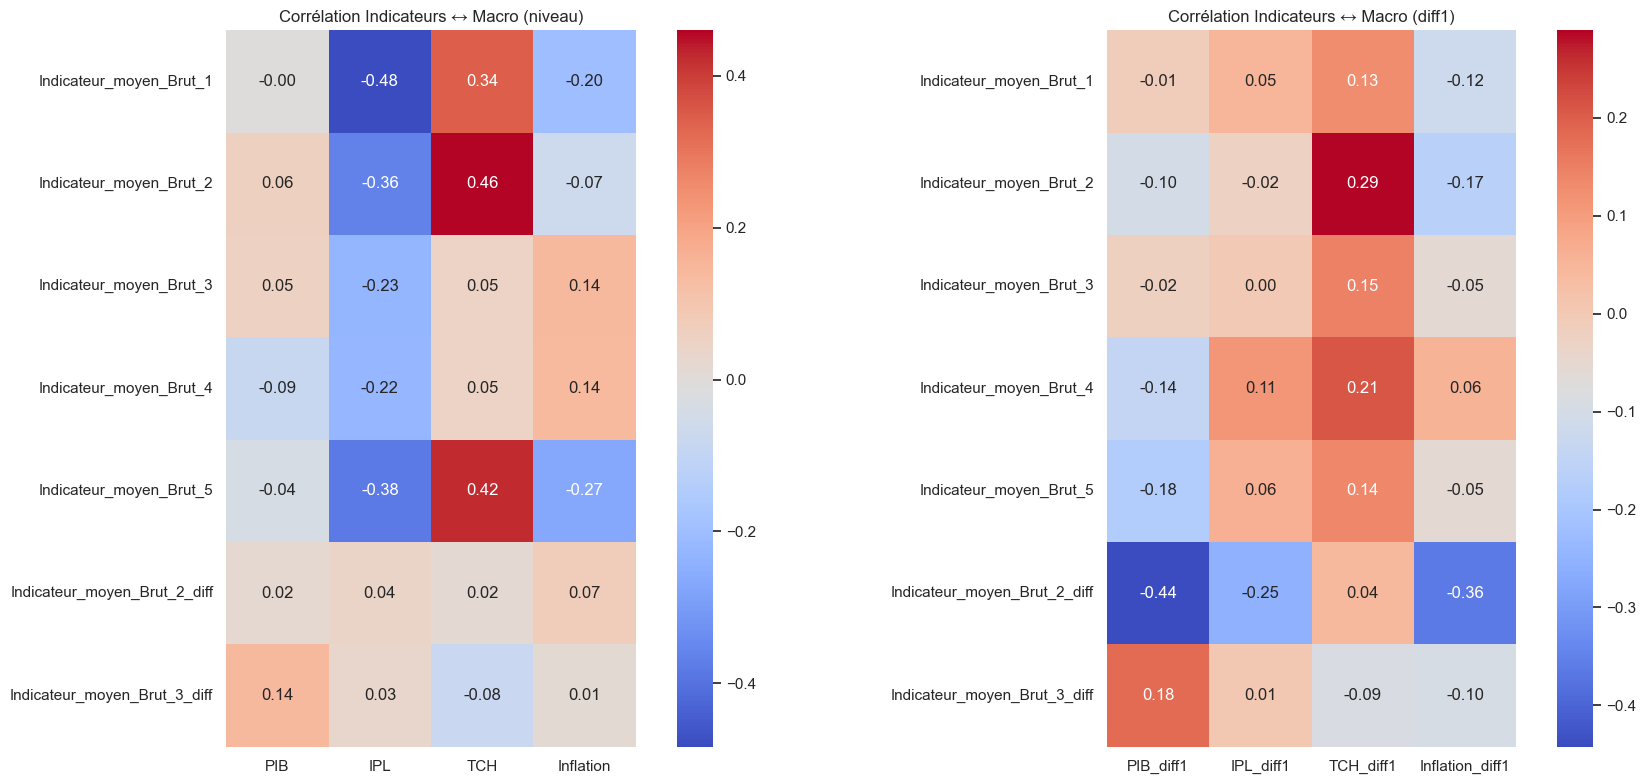

In [29]:
from ccf_utils import drop_unused_columns, plot_full_correlation_matrix, plot_correlation_with_macro

df_merged = drop_unused_columns(df_merged)

plot_full_correlation_matrix(df_merged)

correlation_macro, correlation_macro_diff = plot_correlation_with_macro(df_merged)


In [96]:
import importlib
import model
importlib.reload(model)

<module 'model' from 'c:\\Users\\dumas\\PycharmProjects\\Credit\\Credit-Risk-Project\\model.py'>

In [97]:
from model import CointegrationTester

df = df_merged.copy()
variables = ["TCH", "Inflation", "IPL", "Indicateur_moyen_Brut_2", "Indicateur_moyen_Brut_3"]

tester = CointegrationTester(df, variables)

df_results_eg = tester.run_engle_granger()
display(df_results_eg)

df_results_joh = tester.run_johansen(group_size=3)
display(df_results_joh)

beta, pval = tester.compute_combination_and_test_adf(["TCH", "Inflation", "IPL"])
print("Coefficients beta :", beta)
print("ADF p-value :", pval)


,Série 1,Série 2,Stat cointégration,p-value,Cointégré
7,IPL,Indicateur_moyen_Brut_2,-3.110856,0.086143,False
8,IPL,Indicateur_moyen_Brut_3,-1.849026,0.605618,False
0,TCH,Inflation,-1.719351,0.668006,False
5,Inflation,Indicateur_moyen_Brut_2,-1.589827,0.725165,False
4,Inflation,IPL,-1.526685,0.750818,False
9,Indicateur_moyen_Brut_2,Indicateur_moyen_Brut_3,-1.262358,0.840807,False
6,Inflation,Indicateur_moyen_Brut_3,-1.109248,0.880093,False
1,TCH,IPL,-0.986844,0.905314,False
2,TCH,Indicateur_moyen_Brut_2,-0.919156,0.917139,False
3,TCH,Indicateur_moyen_Brut_3,-0.323520,0.974772,False


,Variables,Nombre relations cointégrées (5%)
0,"(TCH, Inflation, IPL)",1
1,"(TCH, Inflation, Indicateur_moyen_Brut_2)",0
2,"(TCH, Inflation, Indicateur_moyen_Brut_3)",0
3,"(TCH, IPL, Indicateur_moyen_Brut_2)",1
4,"(TCH, IPL, Indicateur_moyen_Brut_3)",2
5,"(TCH, Indicateur_moyen_Brut_2, Indicateur_moye...",1
6,"(Inflation, IPL, Indicateur_moyen_Brut_2)",1
7,"(Inflation, IPL, Indicateur_moyen_Brut_3)",3
8,"(Inflation, Indicateur_moyen_Brut_2, Indicateu...",1
9,"(IPL, Indicateur_moyen_Brut_2, Indicateur_moye...",2


Coefficients beta : [0.81854528 0.31618227 0.34479611]
ADF p-value : 0.00019330842336592944


=== Résultats des modèles ===

--- Indicateur_moyen_Brut_1 ---
                               OLS Regression Results                              
Dep. Variable:     Indicateur_moyen_Brut_1   R-squared:                       0.375
Model:                                 OLS   Adj. R-squared:                  0.155
Method:                      Least Squares   F-statistic:                     1.702
Date:                     Tue, 27 May 2025   Prob (F-statistic):              0.110
Time:                             01:30:53   Log-Likelihood:                 53.688
No. Observations:                       47   AIC:                            -81.38
Df Residuals:                           34   BIC:                            -57.32
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------

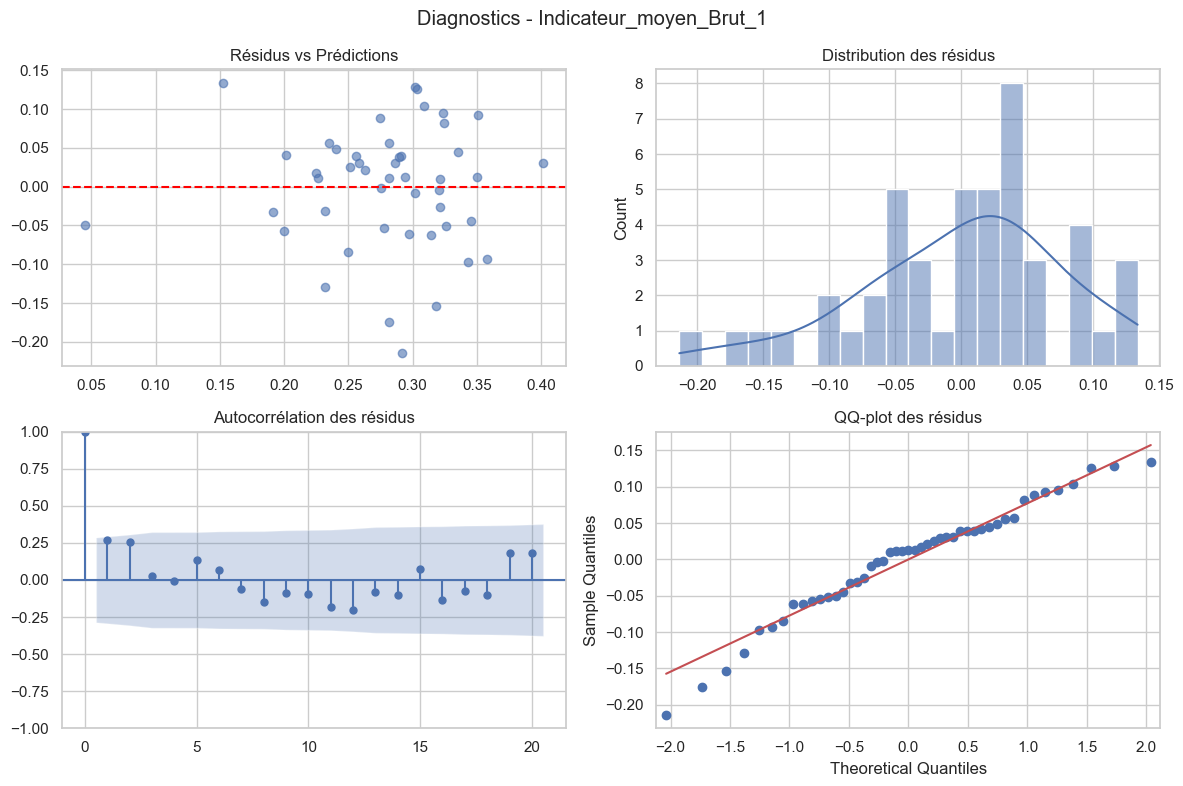

--- Tests sur les résidus pour Indicateur_moyen_Brut_1 ---
Durbin-Watson: 1.4476076648526146
Breusch-Pagan p-val: 0.5666401240328918
Shapiro-Wilk p-val: 0.17592796970008917
Jarque-Bera p-val: 0.23253307476292903



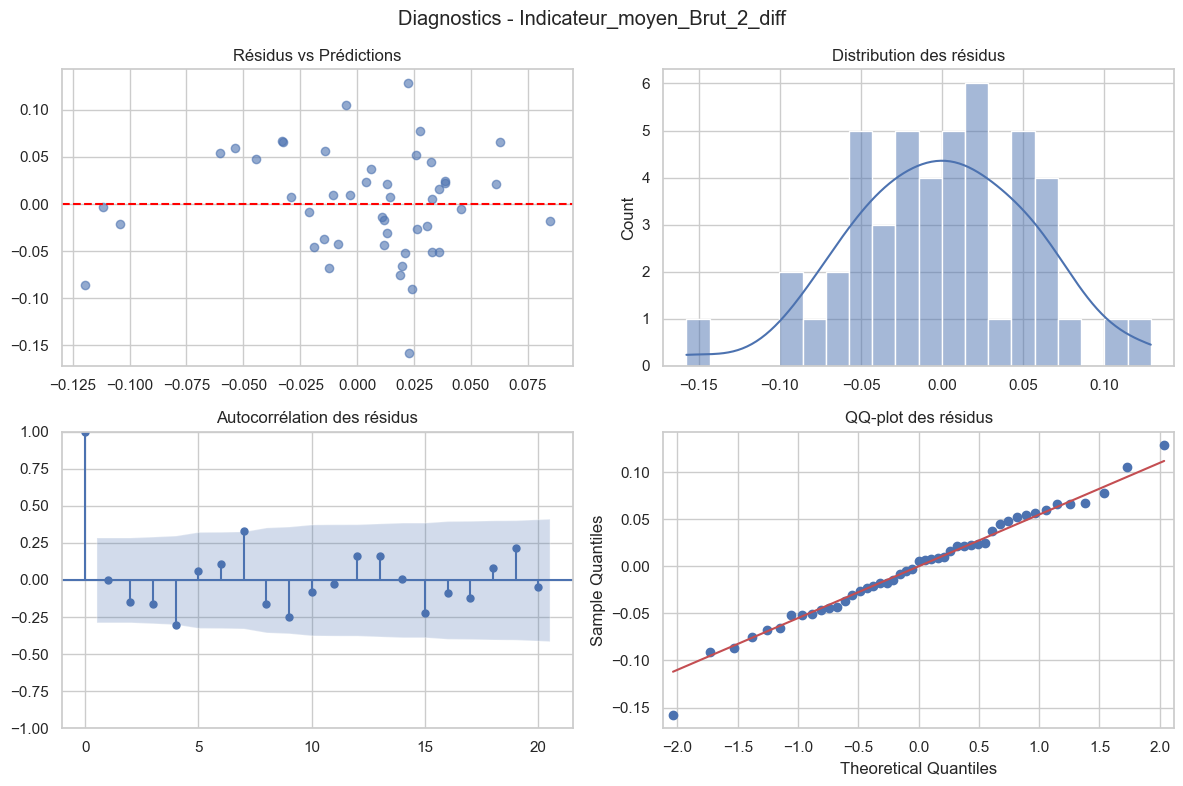

--- Tests sur les résidus pour Indicateur_moyen_Brut_2_diff ---
Durbin-Watson: 1.9672999090244407
Breusch-Pagan p-val: 0.8544540563879844
Shapiro-Wilk p-val: 0.959653609352753
Jarque-Bera p-val: 0.8187693020401636



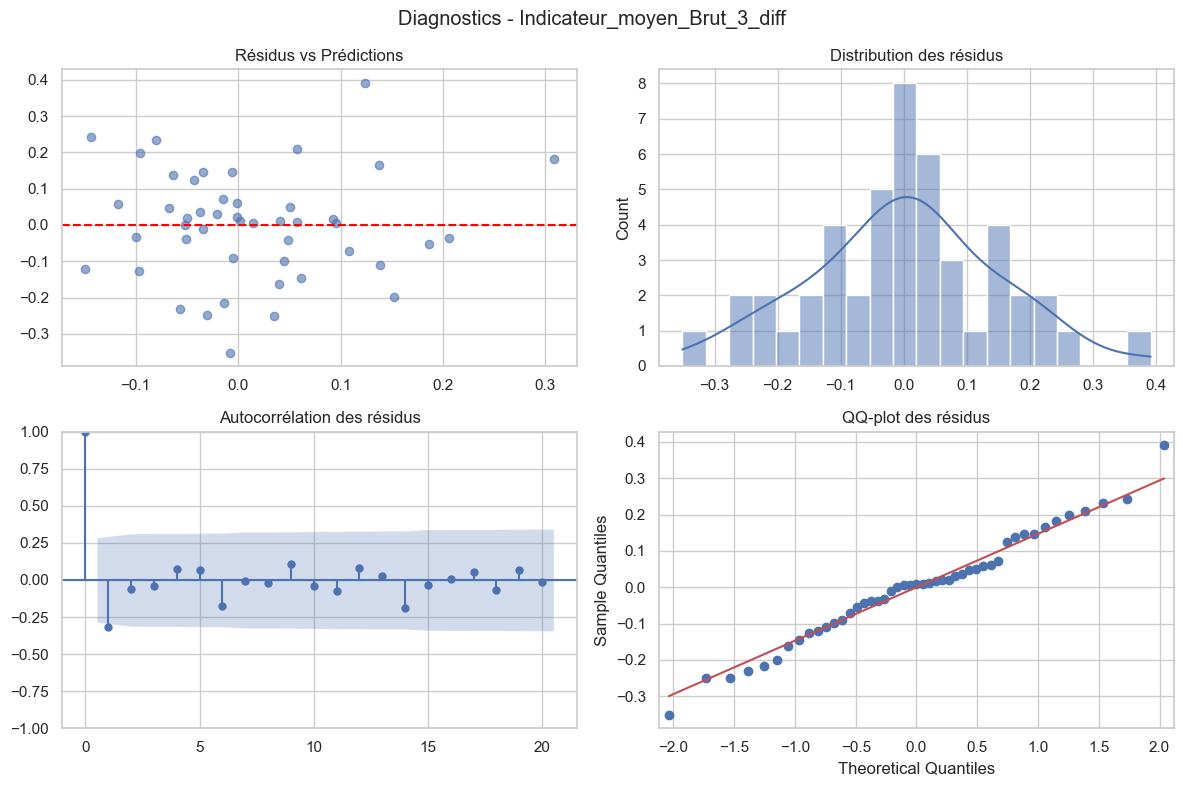

--- Tests sur les résidus pour Indicateur_moyen_Brut_3_diff ---
Durbin-Watson: 2.6181658924113425
Breusch-Pagan p-val: 0.2355640475922354
Shapiro-Wilk p-val: 0.8888715352599572
Jarque-Bera p-val: 0.9814096414612701



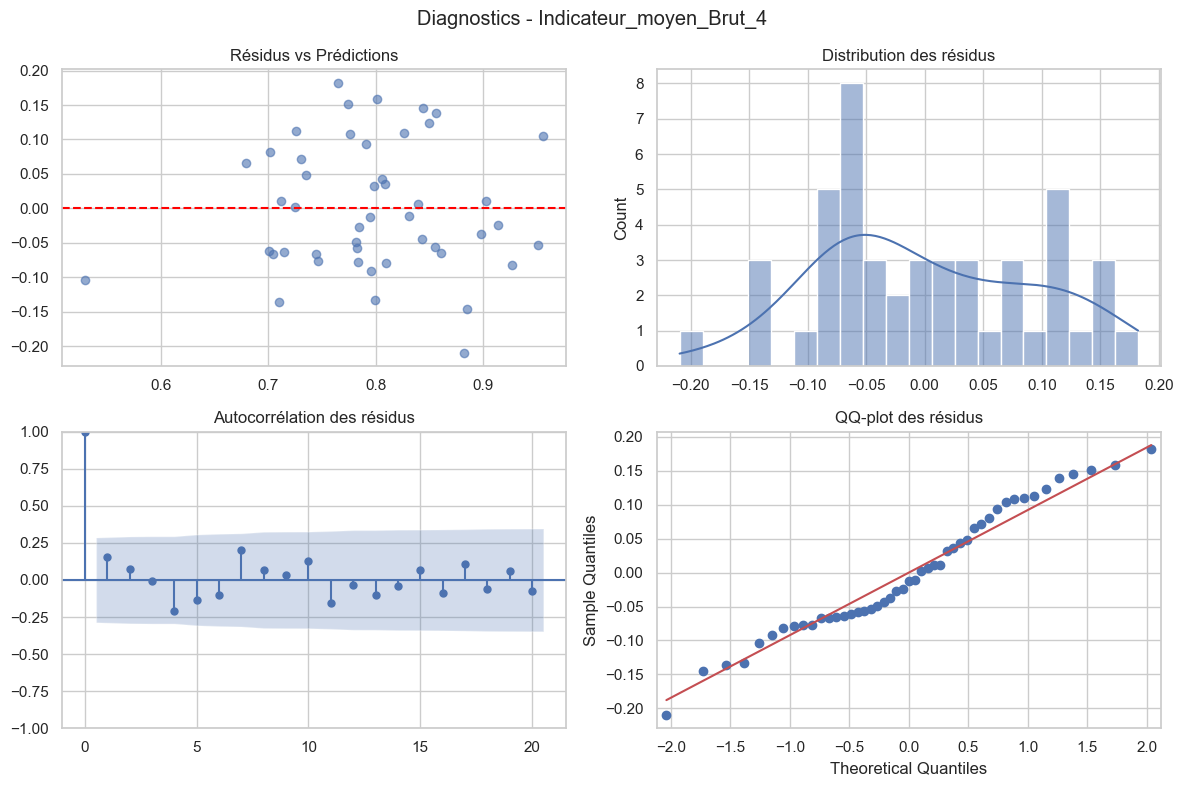

--- Tests sur les résidus pour Indicateur_moyen_Brut_4 ---
Durbin-Watson: 1.6066282075351928
Breusch-Pagan p-val: 0.2917490917485239
Shapiro-Wilk p-val: 0.21789429048406933
Jarque-Bera p-val: 0.5149645950041599



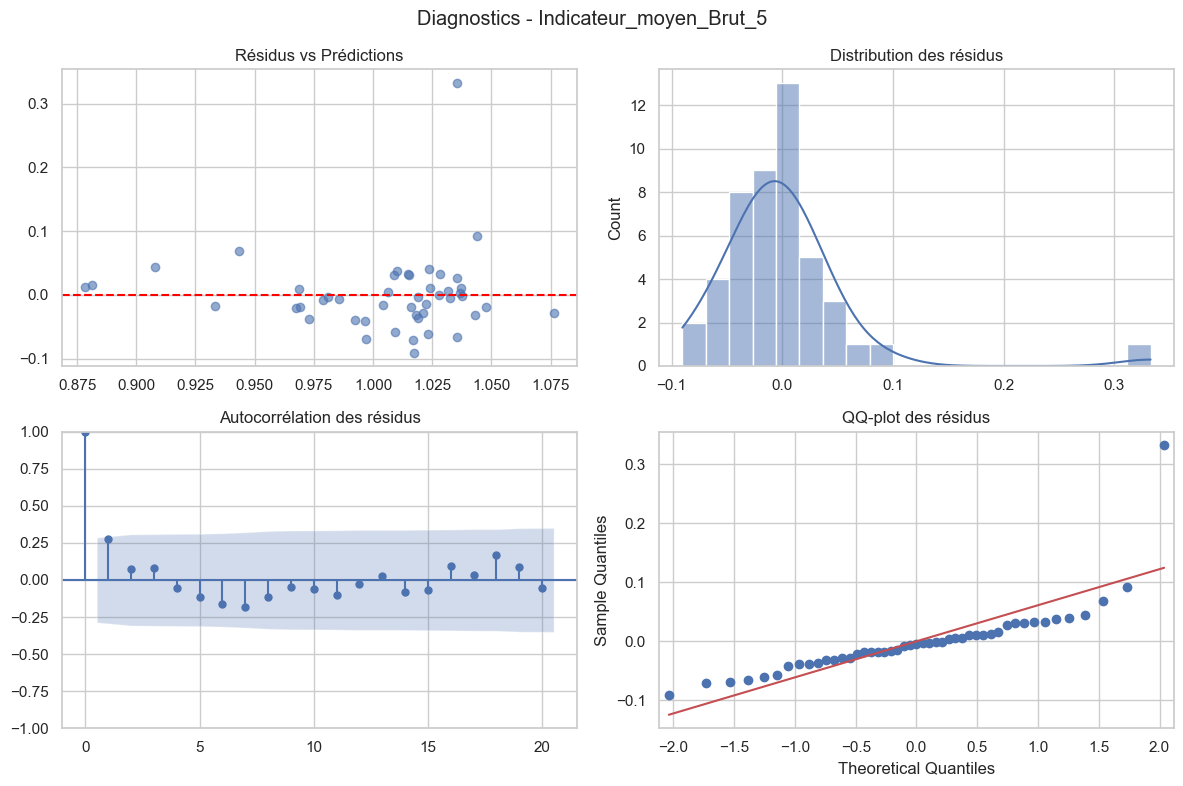

--- Tests sur les résidus pour Indicateur_moyen_Brut_5 ---
Durbin-Watson: 1.4288126153760061
Breusch-Pagan p-val: 0.9976475438479587
Shapiro-Wilk p-val: 2.206396743897933e-08
Jarque-Bera p-val: 5.305818047788826e-129



In [98]:
from model import enrich_macro_features, OLSModelEvaluator

# Étape 1 : enrichir les variables macro
df = enrich_macro_features(df_merged.copy())

# Étape 2 : définition des variables
macro_vars = [
    'PIB_to_IPL', 'TCH_ma3', 'Inflation_acc', 'TCH_volatility', 'TCH_diff1',
    'PIBxInflation', 'InflationxTCH', 'TCH_to_Inflation', 'IPL_to_TCH',
    'Inflation_growth_3q', 'recession_flag', 'pre_covid'
]
segments = [
    'Indicateur_moyen_Brut_1',
    'Indicateur_moyen_Brut_2_diff',
    'Indicateur_moyen_Brut_3_diff',
    'Indicateur_moyen_Brut_4',
    'Indicateur_moyen_Brut_5'
]

# Étape 3 : suppression des lignes incomplètes et modélisation
df_clean = df.dropna(subset=macro_vars + segments)
evaluator = OLSModelEvaluator(df_clean, macro_vars, segments)
evaluator.fit_models()
evaluator.display_results()
evaluator.plot_diagnostics()


In [99]:
from model import test_pls_on_segments, compare_models_on_segment, run_segment_models

# Exécuter la régression PLS sur les 5 segments
test_pls_on_segments(df, macro_vars, segments)

# Comparer plusieurs modèles pour un segment spécifique (ex : segment 5)
results_df = compare_models_on_segment(df, macro_vars, "Indicateur_moyen_Brut_5")
display(results_df)

# Exécuter la sélection automatique par corrélation sur tous les segments
results_df_ols, results_df_wls = run_segment_models(df, macro_vars, segments)


=== PLS Regression Test ===


ValueError: Length of values (47) does not match length of index (59)

In [ ]:
from model import run_segment_models

ols_df, wls_df = run_segment_models(df, macro_vars, segments)
display(ols_df)
display(wls_df)
print(len(macro_vars), macro_vars)


,Segment,Model,k,R2_score,Coefficients
0,Indicateur_moyen_Brut_1,OLS,7,0.2461,"{'const': 0.20344119156009943, 'pre_covid': 0...."
1,Indicateur_moyen_Brut_2_diff,OLS,7,0.0989,"{'const': -0.010491580142152365, 'PIBxInflatio..."
2,Indicateur_moyen_Brut_3_diff,OLS,7,0.0493,"{'const': 0.015139513401995233, 'InflationxTCH..."
3,Indicateur_moyen_Brut_4,OLS,7,0.1966,"{'const': 0.7596110003479621, 'recession_flag'..."
4,Indicateur_moyen_Brut_5,OLS,7,0.2375,"{'const': 0.9489193564406053, 'pre_covid': 0.0..."


,Segment,Model,k,R2_score,Coefficients
0,Indicateur_moyen_Brut_1,WLS,7,0.1943,"{'const': 0.20685929487143204, 'pre_covid': 0...."
1,Indicateur_moyen_Brut_2_diff,WLS,7,0.0999,"{'const': -0.011224045728698829, 'PIBxInflatio..."
2,Indicateur_moyen_Brut_3_diff,WLS,7,0.0425,"{'const': 0.0005069139279010246, 'InflationxTC..."
3,Indicateur_moyen_Brut_4,WLS,7,0.2131,"{'const': 0.7586277478079986, 'recession_flag'..."
4,Indicateur_moyen_Brut_5,WLS,7,0.2710,"{'const': 0.9502461832267317, 'pre_covid': 0.0..."


12 ['PIB_to_IPL', 'TCH_ma3', 'Inflation_acc', 'TCH_volatility', 'TCH_diff1', 'PIBxInflation', 'InflationxTCH', 'TCH_to_Inflation', 'IPL_to_TCH', 'Inflation_growth_3q', 'recession_flag', 'pre_covid']
